## Testing the IB solver

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import multivariate_normal
from IB import IB

In [4]:
plt.rcParams['figure.figsize'] = [6, 4]

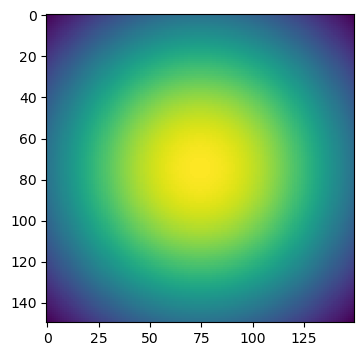

In [6]:
# create a nondeterministic map

sizeX = 150
dimX = 2
sizeY = 2

X  = [(i,j) for i in range(sizeX) for j in range(sizeX)] #feature space
Y = [0,1] #binary labels

px = np.array([[1./(sizeX*sizeX) for i in range(sizeX)] for j in range(sizeX)]) #uniform distribition over X

#create p(y|x), named py_x in code
x1,x2 = np.meshgrid(np.linspace(-1,1,sizeX),np.linspace(-1,1,sizeX))
pos = np.dstack((x1, x2))
rv = multivariate_normal(cov = [[1,0],[0,1]])
py_x = np.empty(x1.shape + (2,))
py_x[:,:,1] = rv.pdf(pos)
py_x[:,:,1] = py_x[:,:,1]/max([max(p) for p in py_x[:,:,1]])
py_x[:,:,0] = -py_x[:,:,1] +1

#compute p(x,y)
pxy = py_x/np.sum(py_x)
plt.imshow(pxy[:,:,1])

In [7]:
#test IB for beta = 0.5
qt_x, Ix_t, Iy_t, change, n  = IB(pxy, px, py_x, X, 0.5, 100,0.1)


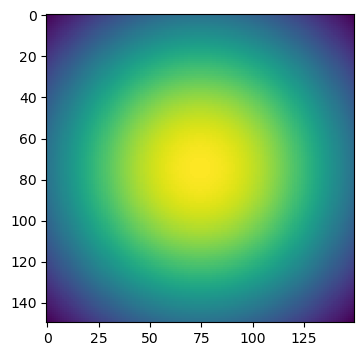

In [8]:
#plot the resuting map
plt.imshow(qt_x[:,:,1])

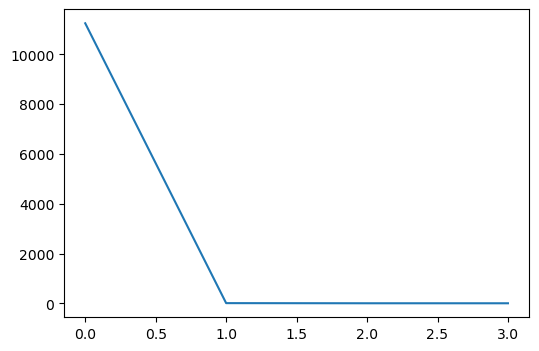

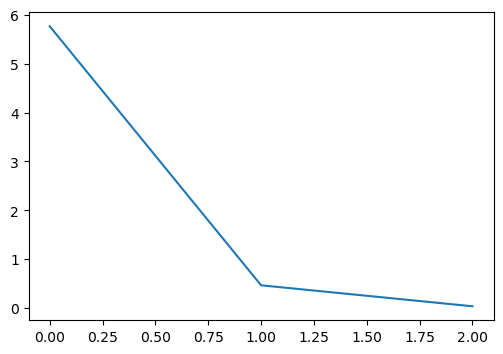

3


In [10]:
#chack how fas the algorithm converges
plt.plot(change[:n+1])
plt.show()
plt.plot(change[1:n+1])
plt.show()
print(n)

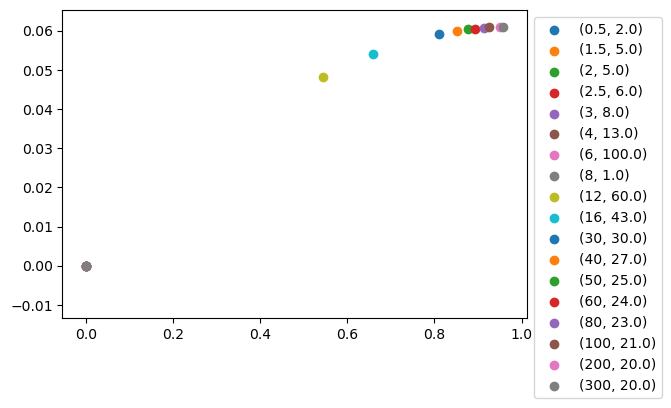

[  2.   5.   5.   6.   8.  13. 100.   1.  60.  43.  30.  27.  25.  24.
  23.  21.  20.  20.]


In [13]:
# test IB for many values of beta
N=100
betas = [0.5,1.5,2,2.5,3,4,6,8,12,16,30,40,50,60,80,100,200,300]
b = len(betas)
changes = np.zeros((b,N))
qt_xs = np.zeros((b,)+ py_x.shape)
Ixts = np.zeros(b)
Iyts = np.zeros(b)
ns = np.zeros(b)
for i in range(b):
    qt_xs[i], Ixts[i], Iyts[i], changes[i,:], ns[i] = IB(pxy, px, py_x, X, betas[i], N)
    plt.scatter(Ixts[i],Iyts[i], label= (betas[i],int(ns[i])))
plt.legend( loc=0, bbox_to_anchor=(1.0, 1.0))
plt.show()

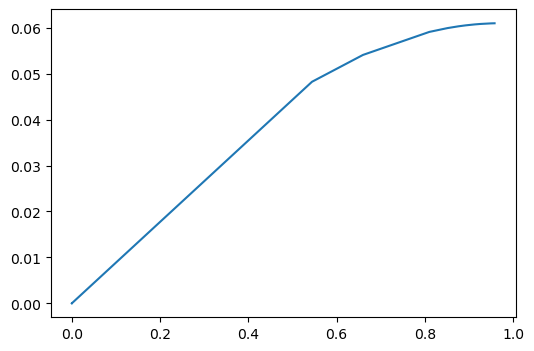

In [14]:
# plot the IB curve
plt.plot(Ixts,Iyts)
plt.show()

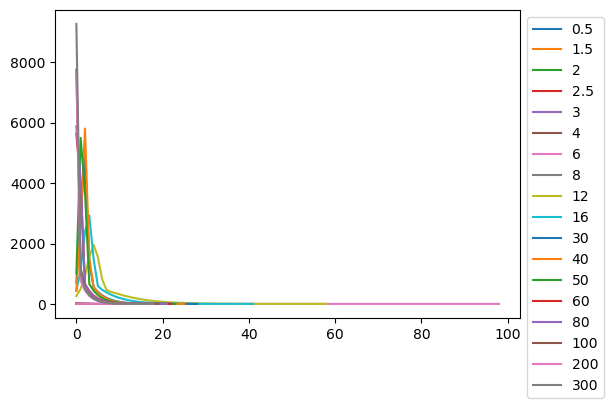

In [15]:
# plot convergence for different values of beta
for i in range(b):
    plt.plot(changes[i,1:int(ns[i])], label= betas[i])
plt.legend( loc=0, bbox_to_anchor=(1.0, 1.0))
plt.show()